data (300, 2)
data (300, 2)
data (300, 2)
data (300, 2)
data (300, 2)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


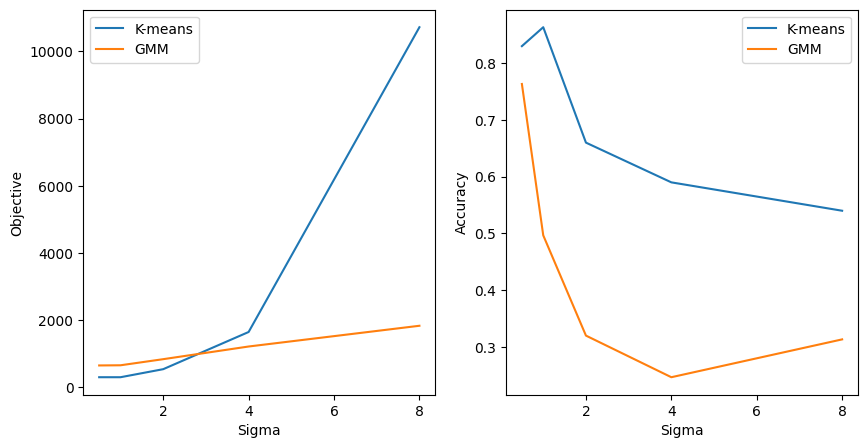

In [22]:
# Importing numpy and matplotlib modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Defining the Gaussian distributions parameters
means = np.array([[-1, -1], [1, -1], [0, 1]])
covs = np.array([[[2, 0.5], [0.5, 1]], [[1, -0.5], [-0.5, 2]], [[1, 0], [0, 2]]])
labels = np.array(['a', 'b', 'c'])

# Function to generate synthetic data
def generate_data(n, sigma):
  # Initializing an empty array for data
  data = np.empty((0, 2))
  # Looping over the distributions
  for i in range(3):
    # Sampling n points from each distribution
    x = np.random.multivariate_normal(means[i], sigma * covs[i], n)
    # Appending the sampled points to the data array
    data = np.vstack((data, x))
  # Returning the data array
  print("data",data.shape)
  return data
  

# Function to implement K-means clustering
def kmeans(x, k, max_iter):
  # Initializing an empty array for cluster labels
  labels = np.empty(len(x))
  # Randomly choosing k initial centroids
  centroids = x[np.random.choice(len(x), k, replace=False)]
  # Looping until convergence or maximum iterations
  for _ in range(max_iter):
    # Computing the distances between data points and centroids
    distances = np.linalg.norm(x - centroids[:, np.newaxis], axis=2)
    # Assigning each data point to the closest centroid
    labels = np.argmin(distances, axis=0)
    # Updating the centroids by taking the mean of each cluster
    centroids = np.array([x[labels == i].mean(axis=0) for i in range(k)])
  # Returning the labels and centroids
  return labels, centroids

# Function to implement Gaussian Mixture Model
def gmm(x, k, max_iter):
  # Initializing an empty array for cluster labels
  labels = np.empty(len(x))
  # Randomly choosing k initial means
  means = x[np.random.choice(len(x), k, replace=False)]
  # Initializing the covariances as identity matrices
  covs = np.array([np.eye(2) for _ in range(k)])
  # Initializing the mixing coefficients as uniform
  pis = np.ones(k) / k
  # Looping until convergence or maximum iterations
  for _ in range(max_iter):
    # Computing the responsibilities using the current parameters
    r = np.zeros((k, len(x)))
    for i in range(k):
      r[i] = pis[i] * multivariate_normal.pdf(x, means[i], covs[i])
    r = r / r.sum(axis=0)
    # Updating the parameters using the current responsibilities
    Nk = r.sum(axis=1)
    pis = Nk / len(x)
    means = np.dot(r, x) / Nk[:, np.newaxis]
    covs = np.array([np.dot(r[i] * (x - means[i]).T, x - means[i]) / Nk[i] for i in range(k)])
  # Assigning each data point to the cluster with the highest responsibility
  labels = np.argmax(r, axis=0)
  # Returning the labels and parameters
  return labels, means, covs, pis

# Function to compute the clustering objective
def kmeans_objective(x, labels, method):
  # Initializing the objective value
  obj = 0
  # Looping over the clusters
  for i in np.unique(labels):
    # Computing the distance or likelihood of each data point in the cluster
    
    # Using the squared Euclidean distance
    dist = np.sum((x[labels == i] - centroids[i])**2, axis=1)
    # Adding the sum of distances to the objective
    obj += dist.sum()
  return obj

def gmm_objective(x, labels, method):
    obj=0
    for i in np.unique(labels): 
     # Using the multivariate normal likelihood
     lik = multivariate_normal.pdf(x[labels == i], means[i], covs[i])
     # Adding the sum of log-likelihoods to the objective
     obj += np.log(lik).sum()
      
    # Returning the negative objective value
    return -obj

# Function to compute the clustering accuracy
def accuracy(x, labels, method):
  # Initializing an empty array for true labels
  true_labels = np.empty(len(x))
  # Looping over the distributions
  for i in range(3):
    # Assigning the true label to the data points generated from each distribution
    true_labels[i*100:(i+1)*100] = i
  # Initializing a dictionary for mapping cluster ids to true labels
  mapping = {}
  # Looping over the clusters
  for i in np.unique(labels):
    # Finding the closest distribution mean to the cluster center
    if method == 'kmeans':
      center = centroids[i]
    elif method == 'gmm':
      center = means[i]
    closest = np.argmin(np.linalg.norm(center - means, axis=1))
    # Mapping the cluster id to the true label
    mapping[i] = closest
  # Converting the cluster labels to true labels using the mapping
  labels = np.array([mapping[l] for l in labels])
  # Computing the accuracy as the fraction of correctly labeled data points
  acc = np.mean(labels == true_labels)
  # Returning the accuracy
  return acc

# Defining the values of sigma to use
sigmas = [0.5, 1, 2, 4, 8]

# Initializing empty lists for storing the objectives and accuracies
kmeans_objectives = []
kmeans_accuracies = []
gmm_objectives = []
gmm_accuracies = []

# Looping over the values of sigma
for sigma in sigmas:
  # Generating the synthetic data
  x = generate_data(100, sigma)
  # Applying K-means clustering
  labels, centroids = kmeans(x, 3, 100)
  # Computing the objective and accuracy for K-means
  kmeans_objectives.append(kmeans_objective(x, labels, 'kmeans'))
  kmeans_accuracies.append(accuracy(x, labels, 'kmeans'))
  # Applying Gaussian Mixture Model
  labels, means, covs, pis = gmm(x, 3, 100)
  # Computing the objective and accuracy for GMM
  gmm_objectives.append(gmm_objective(x, labels, 'gmm'))
  gmm_accuracies.append(accuracy(x, labels, 'gmm'))

# Plotting the objectives and accuracies against sigma
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sigmas, kmeans_objectives, label='K-means')
plt.plot(sigmas, gmm_objectives, label='GMM')
plt.xlabel('Sigma')
plt.ylabel('Objective')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(sigmas, kmeans_accuracies, label='K-means')
plt.plot(sigmas, gmm_accuracies, label='GMM')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("5_Obj_and_acc_curve.eps")
plt.show()
